# Hashcode 제목에서 키워드 추출하고 워드클라우드 그리기
- [Hashcode](https://qna.programmers.co.kr/)에서 10개의 페이지에 있는 제목들을 추출
- `konlpy`를 이용하여 명사 추출
- `Counter`로 개수 세기
- `WordCloud`로 그림 그리기

In [2]:
# 필요 라이브러리 불러오기
import requests
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Hannanum
from bs4 import BeautifulSoup as BS

from collections import Counter
import time

## 제목들 추출하기

In [4]:
URL = "https://hashcode.co.kr/?page={i}"
titles = []
user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

for i in range(1, 11):
    res = requests.get(URL.format(i=i), user_agent)
    bs = BS(res.text, "html.parser")
    datas = bs.find_all("li", 'question-list-item')

    for data in datas:
        titles.append(data.h4.text.strip())
    time.sleep(0.5)

print(titles)

['widget_test.dart에서 오류가 납니다', '고1 프로그래밍', 'text에니메이션 효과를 영상처럼 표현하고 싶어요!!!', '[플러터] 다른 사람의 작업물 실행하니 빈화면이 뜹니다.', '백엔드 개발자로 1년간 취준했던 신입입니다. IT 쪽 개발 전망에 대해 몇가지 궁금한 점이 있습니다.', '욜로와 텐서플로우', '파이썬 확장파일을 만든후 열려고 하면 순식간에 열린듯 하다가 사라져버립니다.', 'certbot으로 받은 인증서로 ssl 접속이 안됩니다', '파이썬 초보입니다. 5×5로 입력을 받아서 가장 긴 막대기의 길이를 출력하는 코드', '링버퍼 내 & 연산자를 모르겠습니다.', 'next js 와 express 연동 질문', 'c언어 연산자 우선순위 질문', '가져오기를 못 하겠습니다', 'cafe24 CSS 로그인버튼 가운데정렬 질문드립니다.', '크롤링 오류 (사진을 다운을 못받아요)', 'Warning : Undefined array key "" in /hosting/myh/html/usersconsole.php on line 43', 'php sql 문 회원관리', '자바 클래스 추가만으로 객체 생성하기', 'Rapipay Login', 'xcode로 c언어 파일 생성및 작성하고 싶은데 뭐가 문제인지 모르겠네요', 'OLS 모델 계수 역변환 방법', '도움 부탁드립니다', 'java while문 사용 후 반복시 글자 밀림', 'Random number wheel', '[Vue.js] JSON 파싱 시 같은 포맷으로 2건 응답 받는데 하나만 정상적으로 받는 경우', '파이썬의 데이터 액세스 시간을 줄이지 않는 방법을 알고 싶습니다', 'EC2 로드 밸런서 HTTPS 트래픽 처리불능에 대해 질문합니다.', 'Escorts in Hyderabad', 'Picnob', 'puppeteer 로그인 세션 유지 관련 질문입니다', '지도 롱탭 기능', '어떤 부분에서 오류가 발생했는지 모르겠습니다.', 'python ax.bar3d 그래프의 축 

## konlpy를 이용하여 명사 추출하기

In [5]:
words = []
hannanum = Hannanum()
for title in titles:
    nouns = hannanum.nouns(title)
    words.extend(nouns)
print(len(words))

2101


## Counter로 단어 개수 세기

In [7]:
counter = Counter(words)
print(counter)

Counter({'질문': 97, '파이썬': 76, '언어': 40, '오류': 37, '문제': 37, '코드': 34, '수': 28, '방법': 27, '관련': 24, '질문드': 18, '사용': 17, '코딩': 16, '때': 16, '출력': 15, '중': 15, '저장': 15, '자바': 14, '값': 13, '것': 13, '문': 12, '에러': 12, '코딩테스트': 12, '발생': 11, '프로그램': 11, '궁금': 10, '입력': 10, '클래스': 10, '파': 10, '데이터': 10, '구현': 10, '시': 9, '파일': 9, '함수': 9, '실행': 8, '부분': 8, '데': 7, '배열': 7, '프로그래머스': 7, '이용': 7, '내': 6, '크롤링': 6, '작성': 6, '후': 6, '설치': 6, 'c++': 6, '모듈': 6, '기초': 6, '1': 6, '테스트': 6, '문자열': 6, '결과': 6, '해결': 6, '한': 6, '공부': 6, '식': 6, '이미지': 6, '메소드': 6, '안': 5, '뭐': 5, '시간': 5, '설정': 5, '저': 5, '문의': 5, '웹': 5, '게시판': 5, '변환': 5, '방식': 5, '합': 5, '판다스': 5, '자바스크립트': 5, '프로그래밍': 4, '개발': 4, '도움': 4, '지': 4, '사이트': 4, '알고리즘': 4, '표시': 4, '작동': 4, '관련해서': 4, '질문이요': 4, 'ㅠㅠ': 4, '로': 4, '리스트': 4, '0': 4, '분': 4, '삭제': 4, '엑셀': 4, '텍스트': 4, '데이터프레': 4, '특정': 4, '2': 4, '문자': 4, '영상': 3, '초보': 3, '연산자': 3, '연동': 3, '사진': 3, '객체': 3, '로그': 3, '예상치': 3, '포인터': 3, '이': 3, 'C++': 3, '프로젝트': 3, '진행'

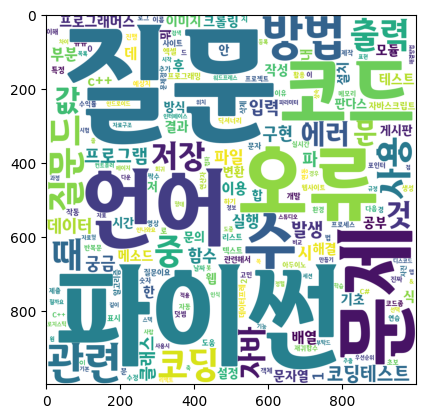

In [8]:
## WordCloud로 그리기
wordCloud = WordCloud(
    font_path="font/YeojuCeramic-TTF.ttf",
    background_color="white",
    width=1000,
    height=1000
)
img = wordCloud.generate_from_frequencies(counter)
plt.imshow(img)